In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('J:\Decision _tree\German_Credit_data.csv')

In [3]:
data.describe()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                                        1000 non-null int64
Status_of_existing_account                           1000 non-null int64
Duration_of_Credit_month                             1000 non-null int64
Payment_Status_of_Previous_Credit(Credit_history)    1000 non-null int64
Purpose_of_loan                                      1000 non-null int64
Credit_Amount                                        1000 non-null int64
Value_of_Savings_account&bonds                       1000 non-null int64
Years_of_Present_Employment                          1000 non-null int64
Percentage_of_disposable_income                      1000 non-null int64
Sex_&_Marital_Status                                 1000 non-null int64
Guarantors/Debtors                                   1000 non-null int64
Duration_in_Present_Residence                        1000 non-null int64
Property          

In [5]:
data.head()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [6]:
data.columns.isnull().any()

False

In [7]:
data.columns[data.columns.isnull().any()]

array([], shape=(0, 21), dtype=object)

In [8]:
data.isnull().sum()

Creditability                                        0
Status_of_existing_account                           0
Duration_of_Credit_month                             0
Payment_Status_of_Previous_Credit(Credit_history)    0
Purpose_of_loan                                      0
Credit_Amount                                        0
Value_of_Savings_account&bonds                       0
Years_of_Present_Employment                          0
Percentage_of_disposable_income                      0
Sex_&_Marital_Status                                 0
Guarantors/Debtors                                   0
Duration_in_Present_Residence                        0
Property                                             0
Age_in_years                                         0
Concurrent_Credits                                   0
Housing                                              0
No_of_Credits_at_this__Bank                          0
Occupation                                           0
No_of_depe

In [9]:
col=['Duration_of_Credit_month','Credit_Amount','Age_in_years']
data[col]=(data[col]-data[col].mean())/(data[col].max()-data[col].min())

In [10]:
data.head()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,-0.042691,4,2,-0.122276,1,2,4,2,...,4,2,-0.259679,3,1,1,3,1,1,1
1,1,1,-0.175044,4,0,-0.025985,1,3,2,3,...,2,1,0.008179,3,1,2,3,2,1,1
2,1,2,-0.130926,2,9,-0.133721,2,4,2,2,...,4,1,-0.223964,3,1,1,2,1,1,1
3,1,1,-0.130926,4,0,-0.063236,1,3,3,3,...,2,1,0.061750,3,1,2,2,2,1,2
4,1,1,-0.130926,4,0,-0.060540,1,3,4,3,...,4,2,0.043893,1,2,2,2,1,1,2


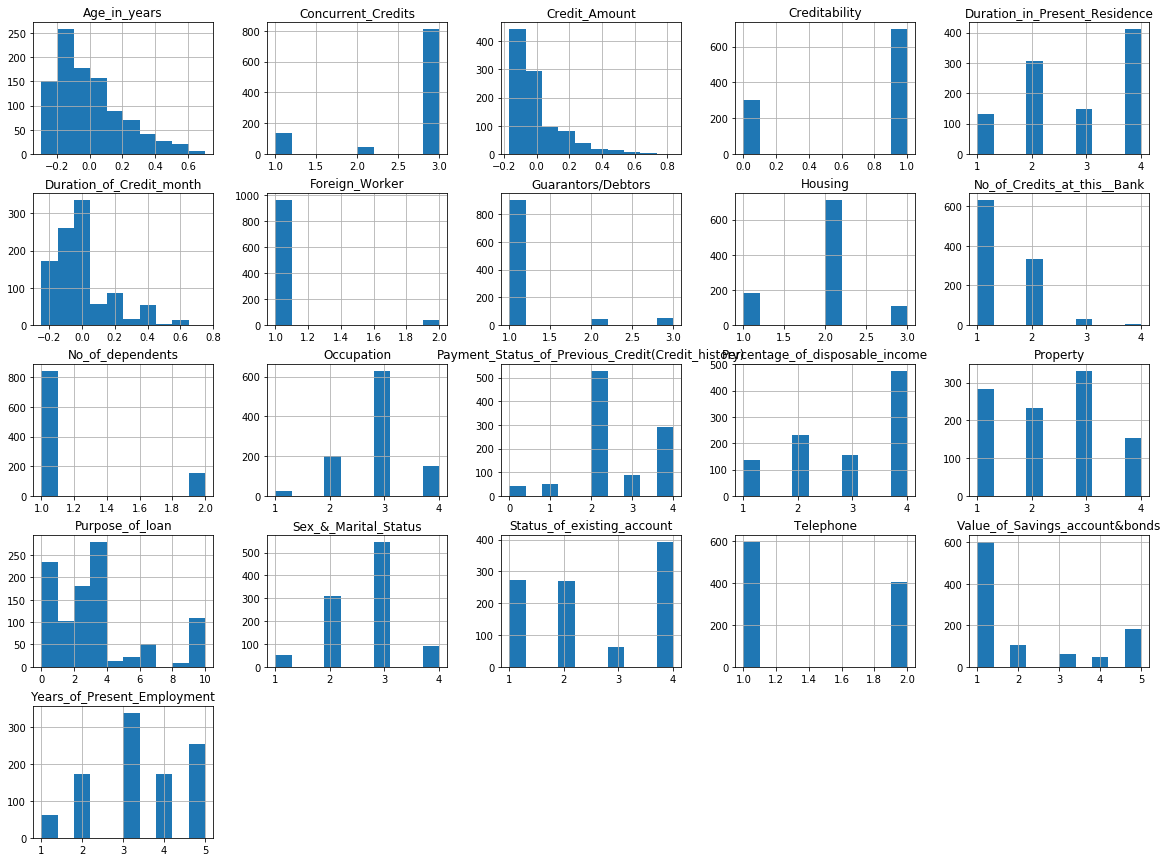

In [11]:
data.hist(figsize=(20,15))
plt.show()

In [12]:
# To understand number of levels in each variables 
data.nunique()

Creditability                                          2
Status_of_existing_account                             4
Duration_of_Credit_month                              33
Payment_Status_of_Previous_Credit(Credit_history)      5
Purpose_of_loan                                       10
Credit_Amount                                        923
Value_of_Savings_account&bonds                         5
Years_of_Present_Employment                            5
Percentage_of_disposable_income                        4
Sex_&_Marital_Status                                   4
Guarantors/Debtors                                     3
Duration_in_Present_Residence                          4
Property                                               4
Age_in_years                                          53
Concurrent_Credits                                     3
Housing                                                3
No_of_Credits_at_this__Bank                            4
Occupation                     

In [13]:
data.corr()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
Creditability,1.000000,0.350847,-0.214927,0.228785,-0.017979,-0.154740,0.178943,0.116002,-0.072404,0.088184,...,-0.002967,-0.142612,0.091272,0.109844,0.018119,0.045732,-0.032735,0.003015,0.036466,0.082079
Status_of_existing_account,0.350847,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,...,-0.042234,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,-0.014145,0.066296,-0.035187
Duration_of_Credit_month,-0.214927,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,...,0.034067,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,-0.023834,0.164718,-0.134680
Payment_Status_of_Previous_Credit(Credit_history),0.228785,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,...,0.063198,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.011550,0.052370,0.028554
Purpose_of_loan,-0.017979,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,...,-0.038221,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,-0.032577,0.078371,-0.113244
Credit_Amount,-0.154740,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,...,0.028917,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,0.017144,0.277000,-0.030662
Value_of_Savings_account&bonds,0.178943,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,...,0.091424,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,0.027514,0.087208,0.010450
Years_of_Present_Employment,0.116002,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,...,0.245081,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,0.097192,0.060518,-0.022845
Percentage_of_disposable_income,-0.072404,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,...,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,-0.071207,0.014413,-0.094762
Sex_&_Marital_Status,0.088184,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,...,-0.027269,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,0.122165,0.027275,0.073103


Text(0.5,1,'Correlation between features')

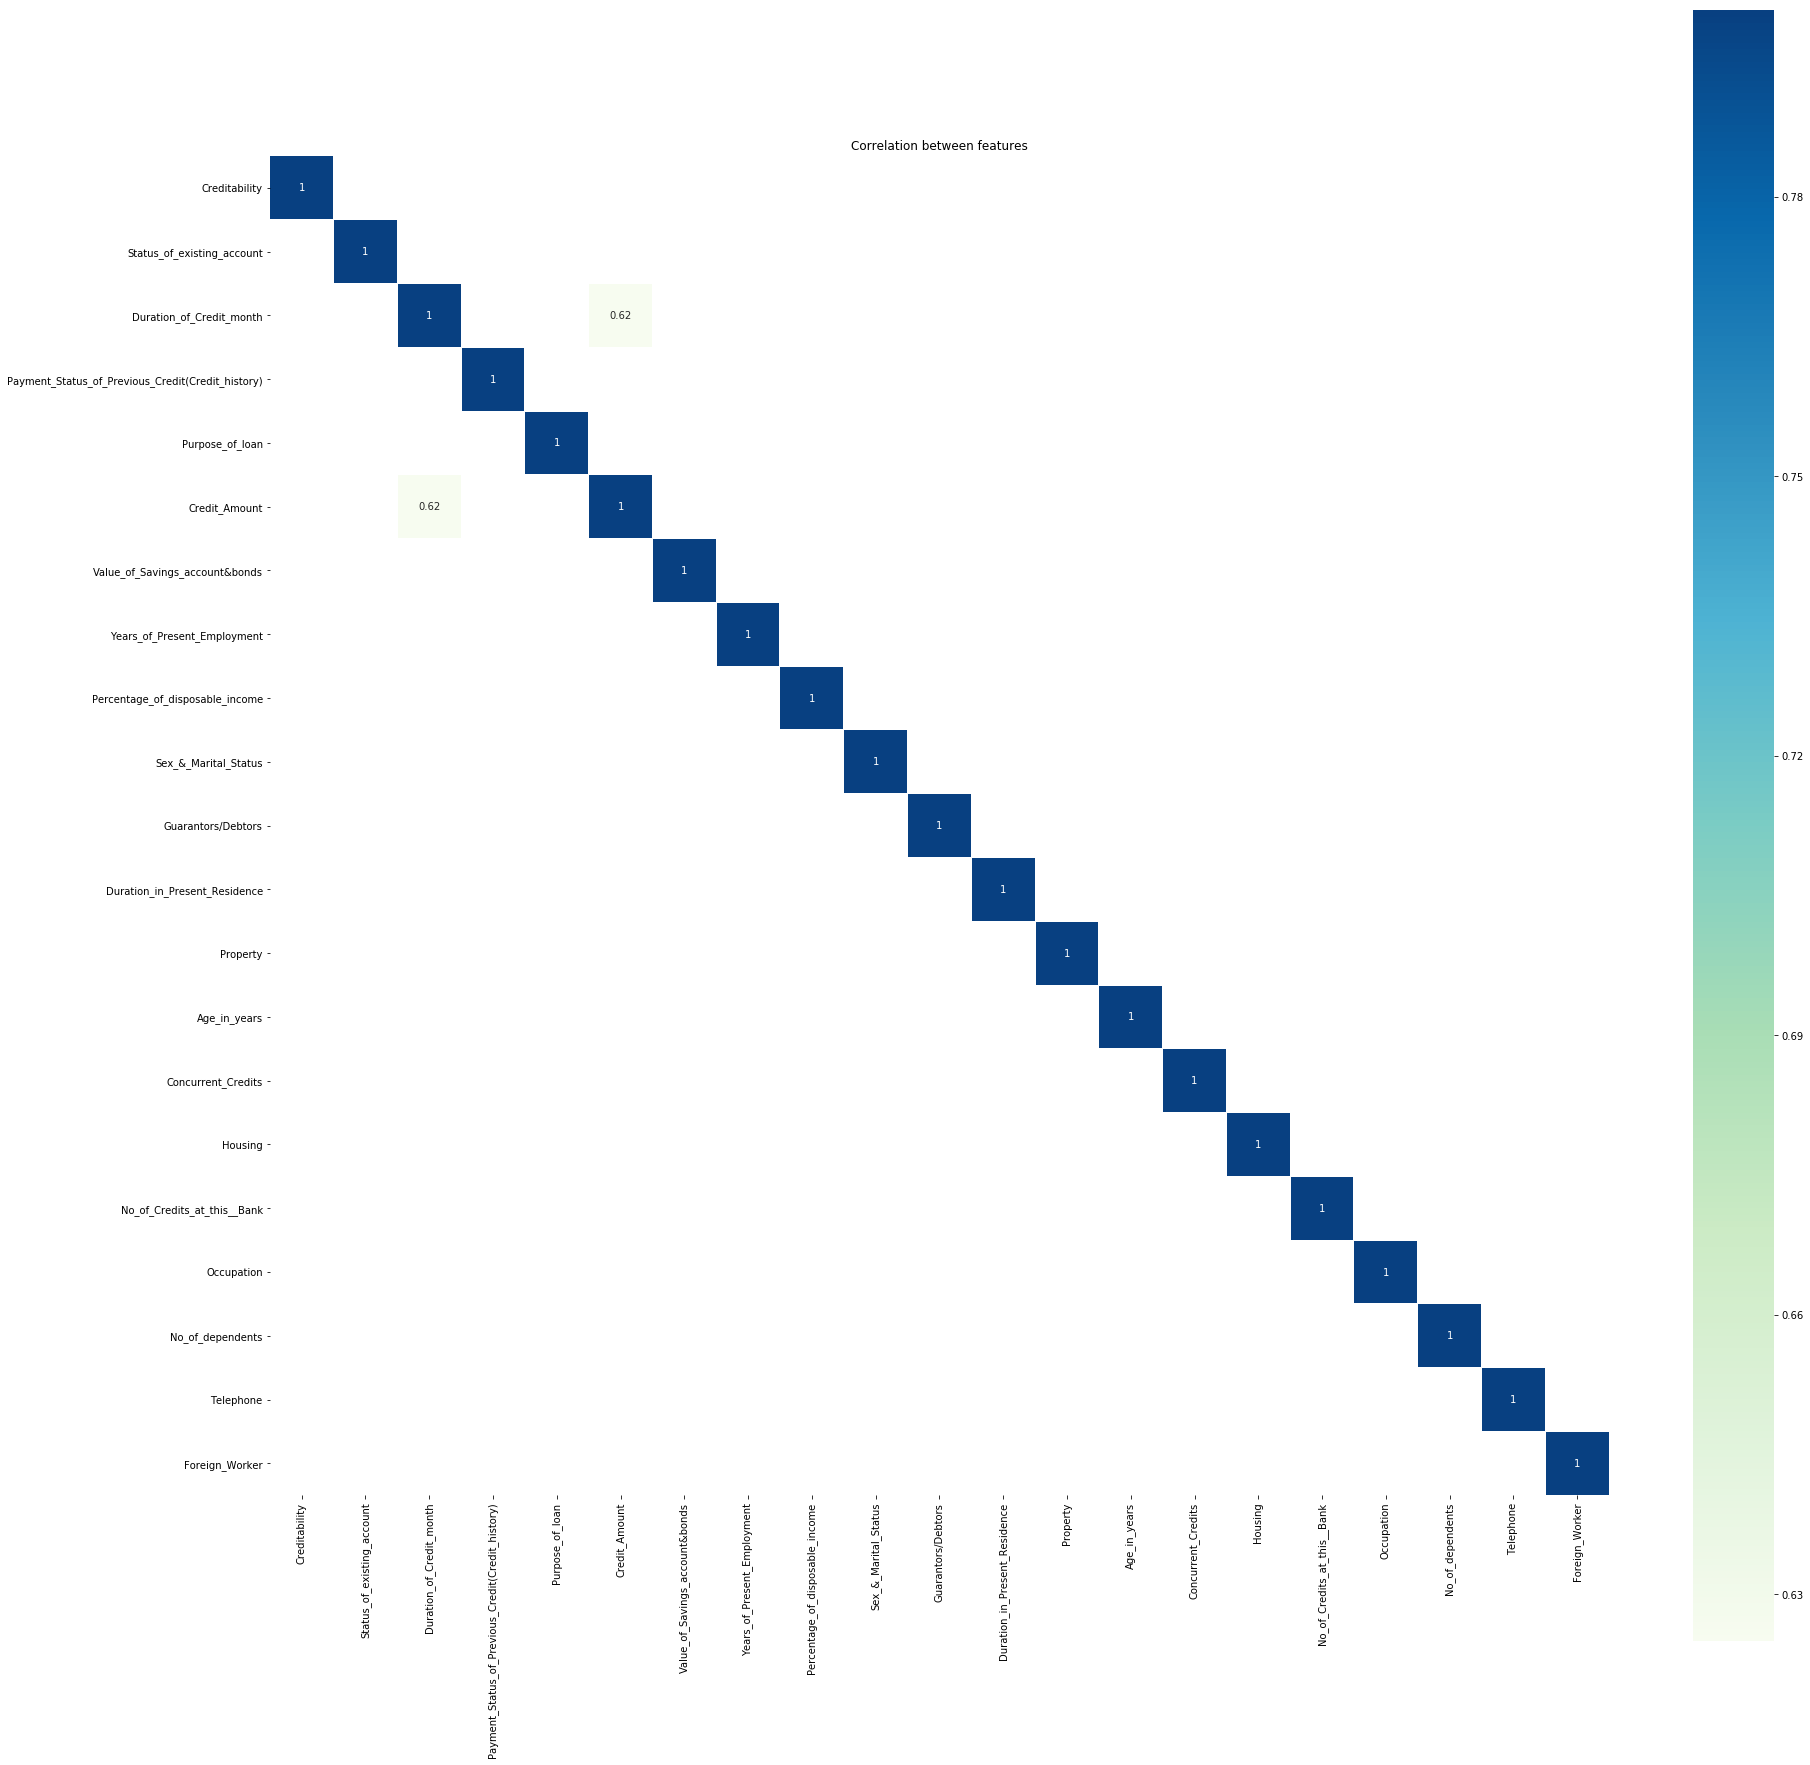

In [14]:
corr = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='GnBu',linecolor="white")
plt.title('Correlation between features')

In [15]:
data.columns

Index(['Creditability', 'Status_of_existing_account',
       'Duration_of_Credit_month',
       'Payment_Status_of_Previous_Credit(Credit_history)', 'Purpose_of_loan',
       'Credit_Amount', 'Value_of_Savings_account&bonds',
       'Years_of_Present_Employment', 'Percentage_of_disposable_income',
       'Sex_&_Marital_Status', 'Guarantors/Debtors',
       'Duration_in_Present_Residence', 'Property', 'Age_in_years',
       'Concurrent_Credits', 'Housing', 'No_of_Credits_at_this__Bank',
       'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker'],
      dtype='object')

In [16]:
data = data.drop(['Duration_of_Credit_month','Credit_Amount'],axis=1)

In [17]:
target_var = data.iloc[:,data.columns=='Creditability']
predictor = data.iloc[:,data.columns !='Creditability']

In [18]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictor,target_var,test_size=0.20,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 18)
(200, 18)
(800, 1)
(200, 1)


C:\Users\SACHIN\Anaconda3.6\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
# Building a Decision Tree model using 'gini' solver and splitter 'best'
from sklearn.tree import DecisionTreeClassifier

clf_DT1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, 
                                min_samples_split=2, min_samples_leaf=1)
# Fitting the model
clf_DT1.fit(x_train, y_train)
# Predicting the model
y_pred_DT1 = clf_DT1.predict(x_test)

In [20]:
from sklearn import metrics
#from sklearn.metrics 

In [21]:
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(clf_DT1, out_file=None))
SVG(graph.pipe(format='svg'))

ModuleNotFoundError: No module named 'graphviz'

In [22]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)

tmp1 = pd.Series({'Model': " Decision Tree with (GINI & BEST) ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_DT1),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT1),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_DT1),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_DT1)})

model_dt1_report = models_report.append(tmp1, ignore_index = True)
model_dt1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with (GINI & BEST),0.617201,0.742188,0.719697,0.65,0.231107


In [23]:
# Building a Decision Tree model using 'gini' solver and splitter 'random'
clf_DT2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=10, 
                                min_samples_split=2, min_samples_leaf=1)
# Fitting the model
clf_DT2.fit(x_train, y_train)
# Predicting the model
y_pred_DT2 = clf_DT2.predict(x_test)

In [24]:
graph = Source( tree.export_graphviz(clf_DT2, out_file=None))
SVG(graph.pipe(format='svg'))

NameError: name 'Source' is not defined

In [25]:
tmp2 = pd.Series({'Model': " Decision Tree with (GINI & RANDOM) ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_DT2),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT2),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT2),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_DT2),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_DT2)})

model_dt2_report = models_report.append(tmp2, ignore_index = True)
model_dt2_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with (GINI & RANDOM),0.677362,0.775362,0.810606,0.72,0.362477


In [26]:
# Building a Decision Tree model using 'entropy' solver and splitter 'best'
clf_DT3 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0,  
                                min_impurity_split=1e-07)
# Fitting the model
clf_DT3.fit(x_train, y_train)
# Predicting the model
y_pred_DT3 = clf_DT3.predict(x_test)

C:\Users\SACHIN\Anaconda3.6\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [27]:
graph = Source( tree.export_graphviz(clf_DT3, out_file=None))
SVG(graph.pipe(format='svg'))

NameError: name 'Source' is not defined

In [28]:
tmp3 = pd.Series({'Model': " Decision Tree with (ENTROPY & BEST) ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_DT3),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT3),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT3),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_DT3),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_DT3)})

model_dt3_report = models_report.append(tmp3, ignore_index = True)
model_dt3_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with (ENTROPY & BEST),0.625223,0.742647,0.765152,0.67,0.254069


In [29]:
# Building a Decision Tree model using 'entropy' solver and splitter 'random'
clf_DT4 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, 
                                min_samples_split=4, min_samples_leaf=2)
# Fitting the model
clf_DT4.fit(x_train, y_train)
# Predicting the model
y_pred_DT4 = clf_DT4.predict(x_test)

In [30]:
graph = Source( tree.export_graphviz(clf_DT4, out_file=None))
SVG(graph.pipe(format = 'svg'))

NameError: name 'Source' is not defined

In [31]:
tmp4 = pd.Series({'Model': " Decision Tree with (ENTROPY & RANDOM) ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_DT4),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT4),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT4),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_DT4),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_DT4)})

model_dt4_report = models_report.append(tmp4, ignore_index = True)
model_dt4_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with (ENTROPY & RANDOM),0.660205,0.751592,0.893939,0.735,0.351761


In [32]:
# Comparison of Decision Tree models based on criterion and splitter
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
model_DT = pd.DataFrame(columns = cols)
model_DT = model_DT.append([model_dt1_report,model_dt2_report,model_dt3_report,model_dt4_report],ignore_index= True)
model_DT

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with (GINI & BEST),0.617201,0.742188,0.719697,0.650,0.231107
1,Decision Tree with (GINI & RANDOM),0.677362,0.775362,0.810606,0.720,0.362477
2,Decision Tree with (ENTROPY & BEST),0.625223,0.742647,0.765152,0.670,0.254069
3,Decision Tree with (ENTROPY & RANDOM),0.660205,0.751592,0.893939,0.735,0.351761


In [33]:
# Building a Decision Tree model using 'entropy' solver and splitter 'random'
clf_DT5 = DecisionTreeClassifier(criterion='gini', max_depth=4, 
                                min_samples_split=20, random_state=999)
# Fitting the model
clf_DT5.fit(x_train, y_train)
# Predicting the model
y_pred_DT5 = clf_DT5.predict(x_test)

In [34]:
from sklearn.cross_validation import KFold
crossvalidation = KFold(n=x_train.shape[0], n_folds=10, shuffle=True, random_state=1)
from sklearn.cross_validation import cross_val_score
score = np.mean(cross_val_score(clf_DT5, x_train, y_train, scoring='accuracy', cv=crossvalidation))
score

0.7100000000000001

In [35]:
target_names = ['0','1']

In [36]:
graph = Source( tree.export_graphviz(clf_DT5, out_file=None, 
                         class_names=target_names))
SVG(graph.pipe(format = 'svg')) 

NameError: name 'Source' is not defined

In [37]:
tmp5 = pd.Series({'Model': " Decision Tree with (ENTROPY & RANDOM) ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_DT5),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT5),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT5),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_DT5),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_DT5)})

model_dt5_report = models_report.append(tmp5, ignore_index = True)
model_dt5_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with (ENTROPY & RANDOM),0.699421,0.792593,0.810606,0.735,0.403153


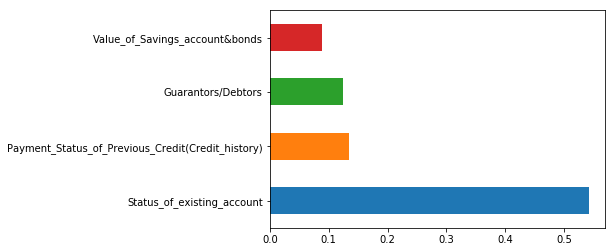

In [38]:
(pd.Series(clf_DT5.feature_importances_, index=x_train.columns)
   .nlargest(4)
   .plot(kind='barh'))